# 5. Linear Regression
Linear regression is a technique used to model the relationship between two or more variables. In particular, linear regression is used when one of the variables is thought to be dependent on a set of independent variables.

---

Set local environment

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

Consider the following data of 506 houses listed on the 1978 Boston real estate market. The dependent variable, `MEDV`, is the price in thousands of dollars, which is thought to be dependent on the columns to its left (AKA the independent variables).

In [2]:
df = pd.read_csv(load_boston()['filename'], header=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Our dependent variable, `MEDV` seems to have a negative relationship with `LSTAT`, which denotes the percentage of "low-status" households in the area. 

We can think of the relationship as a causal one. That is, the percentage of low-status households in the area determines a house's price. The higher the percentage of low-status neighbors, the lower the price will be.

This is most likely not a one-way relationship, but we will use `LSTAT` as the independent variable and `MEDV` as the dependent variable.

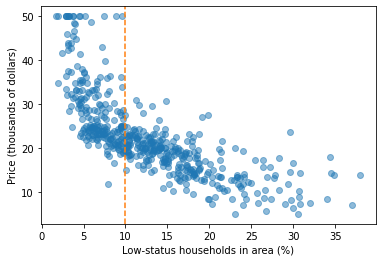

In [3]:
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.5)
plt.xlabel('Low-status households in area (%)')
plt.ylabel('Price (thousands of dollars)')
plt.axvline(10, ls='--', color='C1')
plt.show()

The orange vertical line shows that, for a fixed percentage of low-status households (10%), the price varies considerably. Hence, a house's price can be regarded as a random variable with mean $E(Y|x)$, variance $V(Y|x)$, and so on.

In this notation, $Y$ is a random variable that represents a house's price once $x$ has been fixed. It is important to note that $x$ is not a random variable for the purpose of this model. It should be thought of as a fixed value known exactly to the experimenter. We will see the implications of variablity in the independent variables later on.

The characteristics of the distribution of $Y$ given $x$, and in particular of $E(Y|x)$, change with $x$. The line of $E(Y|x)$ is called the regression of $Y$ on $x$.

The simplest and most important kind of regression is a straight line:

$E(Y|x) = \alpha + \beta x$

Where $\alpha$ is the intercept and $\beta$ is the slope of the line that goes through the expected value of $Y$ for all given values of $x$. Our job is to estimate these two parameters. We typically do this by defining a loss function, which we minimize in order to obtain the line of best fit according to the arbitrary criteria that we choose.

The most common loss function is the sum of squared deviations of observed from estimated values of $y$. Minimizing the cost function will yield the line

$\hat{y} = a + bx$

It is extremely important to understand that $a$ and $b$ are estimates of $\alpha$ and $\beta$ respectively. Minimizing the sum of squared deviations is known as the method of Ordinary Least Squares (OLS).

Suppose we have $n$ pairs of observations $(x_1, y_1)$, $(x_2, y_2)$, etc. The estimators are derived as follows:

$\text{min}_{\{a,b\}} [\space S^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2]$

Which given our linear model is equivalent to:

$\text{min}_{\{a,b\}} \sum_{i=1}^n (y_i - a - bx_i)^2$

Setting the first order conditions to zero:

1. $\frac{\delta S^2}{\delta a} = -2 \sum_{i=1}^{n} (y_i - a - bx_i) = 0$

2. $\frac{\delta S^2}{\delta b} = -2 \sum_{i=1}^{n} x_i(y_i - a - bx_i) = 0$

From the first partial derivative:

$\sum_{i=1}^{n} (y_i - a - bx_i) = \sum_{i=1}^{n} y_i - na - b\sum_{i=1}^{n}x_i$

Solving for $a$:

$a = \frac{\sum_{i=1}^{n} y_i - b\sum_{i=1}^{n}x_i}{n} = \bar{y} - b\bar{x}$

This equation can be expressed as $\bar{y} = a + b\bar{x}$, which tells us that the regression line will go through the points $(\bar{x}, \bar{y})$. If we substitute $a$ into the second partial derivative:

$\sum_{i=1}^{n} x_i(y_i - \bar{y} + b \bar{x} - bx_i) =
\sum_{i=1}^{n} x_i(y_i - \bar{y}) - b \sum_{i=1}^{n} x_i(x_i - \bar{x})$

Solving for $b$:

$b = \frac{\sum_{i=1}^{n} x_i(y_i - \bar{y})}{\sum_{i=1}^{n} x_i(x_i - \bar{x})}$

We have thus found the estimators that minimize the loss function. However, $b$ can be expressed in a more elegant way. In order to do it, note that:

1. $\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) =
\sum_{i=1}^{n} x_i(y_i - \bar{y}) - \bar{x} \sum_{i=1}^{n} (y_i - \bar{y}) =
\sum_{i=1}^{n} x_i(y_i - \bar{y})$
2. $\sum_{i=1}^{n} (x_i - \bar{x})^2 =
\sum_{i=1}^{n} x_i(x_i - \bar{x}) - \bar{x} \sum_{i=1}^{n} (x_i - \bar{x}) =
\sum_{i=1}^{n} x_i(x_i - \bar{x})$

Because $\sum_{i=1}^{n} (w_i - \bar{w}) = 0$ for any array observations.

Hence, we can rewrite $b$ as:

$b = \frac{\sum_{i=1}^{n} x_i(y_i - \bar{y})}{\sum_{i=1}^{n} x_i(x_i - \bar{x})}
=\frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} =
\frac{Cov(x, y)}{V(x)}$

Remember that $S^2$ is our loss function, which we just minimized. In order to measure how well we fit the line that minimizes $S^2$ we rewrite:

$S^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - a - bx_i)^2 =
\sum_{i=1}^{n}(y_i - \bar{y} + b\bar{x} - bx_i)^2 =
\sum_{i=1}^{n} [(y_i - \bar{y}) - b(x_i - \bar{x})]^2$

$\space\space\space\space\space =
\sum_{i=1}^{n} (y_i - \bar{y})^2 + b^2\sum_{i=1}^{n}(x_i - \bar{x})^2 - 2b\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$

Note that the last term is the numerator of $b$. If we solve for the numerator and replace it in the above equation:

$S^2 = \sum_{i=1}^{n} (y_i - \bar{y})^2 + b^2\sum_{i=1}^{n}(x_i - \bar{x})^2 - 2b^2\sum_{i=1}^{n} (x_i - \bar{x})^2$

Therefore:

$S^2 = \sum_{i=1}^{n} (y_i - \bar{y})^2 - b^2\sum_{i=1}^{n}(x_i - \bar{x})^2$

In other words, the squared error of $Y$ from the regression line is the squared error of $Y$ from its mean minus $b^2\sum_{i=1}^n (x_i - \bar{x})^2$. This term is therefore the reduction in the variability of the $Y$ caused by calculating the regression.

In order to make a metric out of this, we divide by the squared error of $Y$ from its mean:

$R^2 = \frac{S^2}{\sum (y_i - \bar{y})^2} = 1 - \frac{b^2\sum(x_i - \bar{x})^2}{\sum (y_i - \bar{y})^2}$

This is known as the R-squared coefficient. It is bound between 0 and 1 and expresses the proportion of the variability of $Y$ that was reduced by fitting the regression line. The closer it is to 1, the better (because it removes a high percentage of the variability) and vice versa. The $R^2$ coefficient is also the square of the correlation coefficient between $X$ and $Y$.

Let's now run the regression of $y$ on $x$.

Estimates for a and b:
CONSTANT    34.553841
LSTAT       -0.950049
dtype: float64

Estimated linear equation:
   y_hat_i = 34.6-1.0x_i


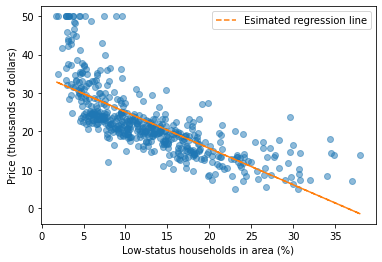

In [4]:
# statsmodels does not model alpha by default, so we must add a column of 1s
df['CONSTANT'] = 1

# Initialize and fit model
reg = sm.OLS(df['MEDV'], df[['CONSTANT','LSTAT']])
reg = reg.fit()

# Print estimates
print('Estimates for a and b:\n', reg.params, '\n', sep='')

# Save parameters in a, b
a = reg.params.values[0]
b = reg.params.values[1]

# Estimated line
print('Estimated linear equation:\n   ', 'y_hat_i = ', round(a, 1), round(b, 1), 'x_i', sep='')

# Plot original scatter
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.5)
plt.xlabel('Low-status households in area (%)')
plt.ylabel('Price (thousands of dollars)')

# Add regression line
plt.plot(df['LSTAT'], a + b * df['LSTAT'], ls='--', color='C1', label='Esimated regression line')
plt.legend()
plt.show()

Let's now take a look a the theoretical justification for the method of estimation we just used.

Suppose that $Y$ is normally distributed with variance $\sigma^2$. Since the variance is a constant, we say that the dependent variable is homoskedastic. Our model is then:

$y_i = \alpha + \beta x_i + \epsilon_i$

Where $\epsilon_i$, the random error in the $i$-th observation is normally distributed with zero mean and variance $\sigma^2$.

The log-likelihood of the set of observations is:

 $\text{log}L = -\frac{n}{2}\text{log}2\pi - -\frac{n}{2}\text{log}\sigma^2 -
 -\frac{n}{2 \sigma^2}\sum_{i=1}^n (y_i - \alpha - \beta x_i)^2$

So solving for $\alpha$ and $\beta$ is literally the same problem as OLS. Hence, the estimators $a$ and $b$, being maximum likelihood estimators, are thus sufficient and normally distributed. This only holds when $Y$ is normally distributed though.

The method of least squares can be applied to model $Y$ as a function of more than one independent variable.

In [5]:
reg = sm.OLS(endog=df['MEDV'], exog=df.drop('MEDV', axis=1))
reg = reg.fit()

In [6]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 06 May 2021   Prob (F-statistic):          6.72e-135
Time:                        03:24:55   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1080      0.033     -3.287      0.0